In [20]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 27 08:19:26 2019

@author: lth
"""
import os
_dir = r'C:\Users\lth\Downloads\WPy-3661\settings\pareto-analytics-master\data\deltas'

dirs = os.listdir(_dir)
dict_lst = []
ex_lst = []
exPair_lst = []

for f in dirs:
    if not f.endswith(".log"):
        continue
    currency_dict = {}
    ex_date = {}
    exPair_date ={}
    file = open(_dir +r'\\'+ f)
    for line in file:
        #split for the pair of arb currency
        pairs = line.split("pair")   
        #there has timestamp which do not have arb information, skip them
        if len(pairs) ==1:
            continue
        #collect the timestamp
        timestamp = pairs[0].split("\"")[3]

        #collect the arbitrage pair 
        for i in range(1, len(pairs) ):
            temp = pairs[i]
            temp_split = temp.split(",")
            #arbitrage pair 
            arb_pair = temp_split[0].split("\"")[2]
            arb_curr, arb_base = arb_pair.split("_")
            
            #there is a format change in the log, contain the information 
            #of value in the exchange
            if "value" not in temp:
                #exchange pair and delta
                ex_pair = temp.split("\"")[6]
                delta = float(temp.split("\"")[9].split("}")[0].split(":")[1])
            else:
                temp_sp = temp.split("\"")
                ex_pair = temp_sp[10]+"/"+temp_sp[16]
                delta =  float(temp_split[1].split(":")[1])
            
            if delta < 0.01 or delta > 0.1:
                continue
            
            #record them in the dictionary
            #the values are list of timestamp, base currency, exchange pair, delta
            if arb_curr not in currency_dict.keys():
                currency_dict[arb_curr] = [[timestamp], [arb_base], [delta] ]
            else:
                currency_dict[arb_curr][0].append(timestamp)
                currency_dict[arb_curr][1].append(arb_base)
                currency_dict[arb_curr][2].append(delta)
                
            #record the exchange pair 
            _from = ex_pair.split("/")[0]
            _to = ex_pair.split("/")[1]
            #sort the order to make it unique
            pair = tuple(sorted([_from,_to]))
            
            #record exchange dadta
            if _from not in ex_date.keys():
                ex_date [_from] = 1
            else:
                ex_date[_from] += 1
                
            if _to not in ex_date.keys():
                ex_date [_to] = 1
            else:
                ex_date[_to] += 1
                
            if pair not in exPair_date.keys():
                exPair_date [pair] = 1
            else:
                exPair_date [pair] += 1
            
                
    dict_lst.append(currency_dict)
    ex_lst.append(ex_date)
    exPair_lst.append(exPair_date)

### Problem 1 &2 :

In [21]:
res_ex = []
res_exPair = []
for ex_date,exPair_date in zip(ex_lst,exPair_lst):
    sort_ex = sorted(ex_date.keys(), key = lambda x: ex_date[x])
    sort_pair = sorted(exPair_date.keys() ,key = lambda x:exPair_date[x])
    res_ex.append(sort_ex[-1])
    res_exPair.append(sort_pair[-1])

print("Daily highest arbitrage opportunity exchange ")
print(res_ex)
print("\n")
print("Daily highest arbitrage opportunity exchange pair")
print(res_exPair)
    
    
    

Daily highest arbitrage opportunity exchange 
['HUO', 'HUO', 'HUO', 'HUO', 'HUO', 'HUO', 'HUO', 'HUO']


Daily highest arbitrage opportunity exchange pair
[('HIT', 'HUO'), ('HIT', 'HUO'), ('HIT', 'HUO'), ('HIT', 'HUO'), ('HIT', 'HUO'), ('HIT', 'HUO'), ('HIT', 'HUO'), ('HIT', 'HUO')]


In [22]:
res_all_ex = {}
res_all_pair = {}


for ex_date,exPair_date in zip(ex_lst,exPair_lst):
    for key in ex_date:
        if key in res_all_ex.keys():
            res_all_ex[key] += ex_date[key]
        else:
            res_all_ex[key] = ex_date[key]
    for key in exPair_date:
        if key in res_all_pair.keys():
            res_all_pair[key] += exPair_date[key]
        else:
            res_all_pair[key] = exPair_date[key]
print("Overall highest arbitrage opportunity exchange ")    
print(sorted(res_all_ex.keys(), key = lambda x: res_all_ex[x])[-1])
print("Overall highest arbitrage opportunity exchange pair")    
print(sorted(res_all_pair.keys(), key = lambda x: res_all_pair[x])[-1])

Overall highest arbitrage opportunity exchange 
HUO
Overall highest arbitrage opportunity exchange pair
('HIT', 'HUO')


The overall bar chart results are:

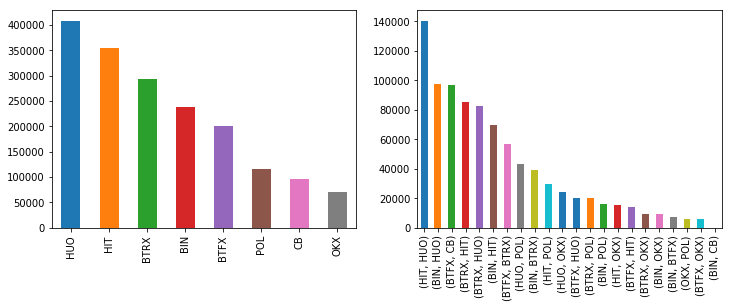

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize = [12,4])

plt.subplot(1,2,1)
pd.Series(res_all_ex).sort_values(ascending = False).plot(kind = "bar")
plt.subplot(1,2,2)
pd.Series(res_all_pair).sort_values(ascending = False).plot(kind = "bar")

### Problem 3

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 27 11:11:30 2019

@author: lth
"""

curDaily = []
#first checking whether the data has consistent number recorded
for dict_date in dict_lst:
    i=0
    for key in dict_date.keys():
        lst = dict_date[key]
        if len(lst[0]) == len(lst[1]) and len(lst[0]) == len(lst[2]):
            continue
        else:
            print("Error for saving data")
            print(i,key)
    i+=1
    
#Then calculate the daily arbitrage oppotrunity for currencies
curDaily = []
arbDaily = []
for dict_date in dict_lst:
    sorted_dict = sorted(dict_date.keys(),key = lambda k: len(dict_date[k][-1]))    
    curDaily.append(sorted_dict[-1])
    arbDaily.append(len(dict_date[sorted_dict[-1]][2]))
print("Highest daily arbitrage oppoturnity currency:" )
print(curDaily)
print("\n")


#merge all dates
alldates = {}
for dict_date in dict_lst:
    for key in dict_date.keys():
        if key not in alldates.keys():
            alldates[key] = len(dict_date[key][-1])
        else:
            alldates[key] += len(dict_date[key][-1])
sort_all = sorted(alldates.keys(), key = lambda x: alldates[x], reverse = True)
print("Highest overall arbitrage oppoturnity currency:")
print(sort_all[0])
print("\n")



Highest daily arbitrage oppoturnity currency:
['XMR', 'XMR', 'XMR', 'XMR', 'XMR', 'XMR', 'XMR', 'XMR']


Highest overall arbitrage oppoturnity currency:
XMR




Text(0.5,1,'Bar chart for top 10 arbitrage oppotrunity currency')

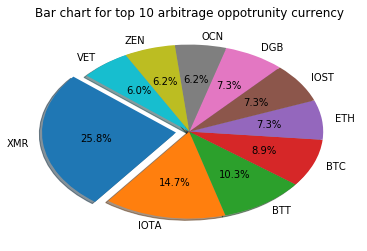

In [25]:
labels = sort_all[:10]
sizes = [alldates[a] for a in labels ]
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title( "Bar chart for top 10 arbitrage oppotrunity currency")

In [26]:
allDelta_dates = {}
for dict_date in dict_lst:
    for key in dict_date.keys():
        if key not in allDelta_dates.keys():
            allDelta_dates[key] = dict_date[key][-1]
        else:
            allDelta_dates[key] += dict_date[key][-1]
sort_all = sorted(allDelta_dates.keys(), key = lambda x: sum(allDelta_dates[x]), reverse = True)


Text(0.5,1,'Bar chart for top 10 arbitrage delta currency')

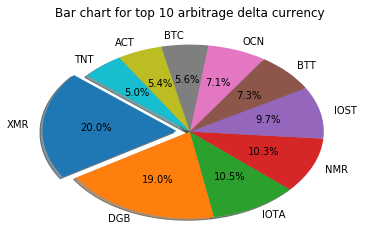

In [27]:
labels = sort_all[:10]
sizes = [sum(allDelta_dates[a]) for a in labels ]
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title( "Bar chart for top 10 arbitrage delta currency")

We can see that although XMR has the largest arbitrage opportunity overall currency, the most potentially profitable currency is NANO.

The following are some density plots for the delta in the top 10 arbitrage currency:

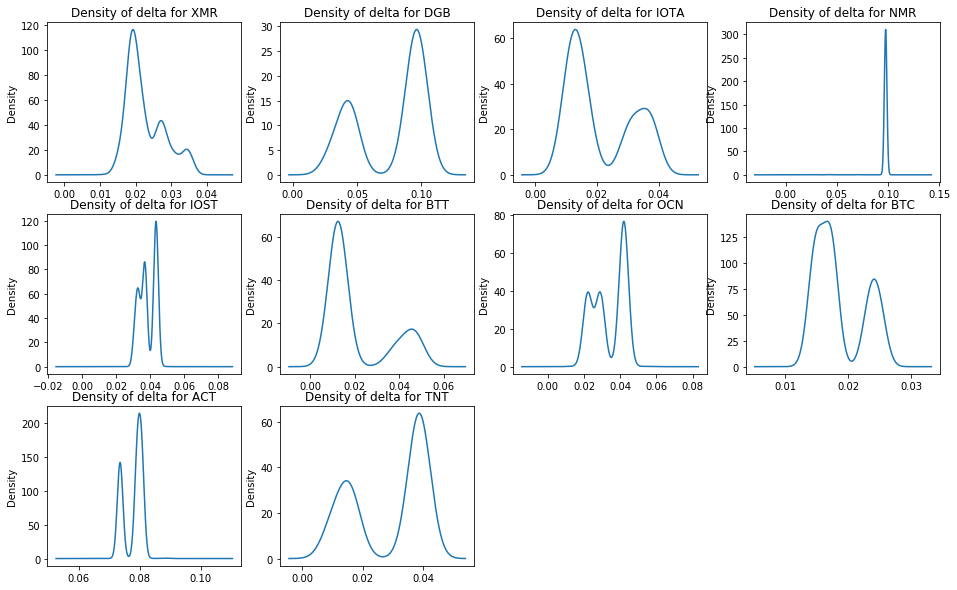

In [28]:
i=1
plt.figure(figsize = [16,10])
for key in labels:
    plt.subplot(3,4,i)
    pSeries = pd.Series(allDelta_dates[key])
    pSeries.plot.kde(bw_method=0.3)
    plt.title("Density of delta for "+ key)
    i+=1
    
    

Most delta has several peaks, which means the arbitrage deltas are concentrate at those peaks.

In [31]:
##checks flip the flag if deltas <0.01 or >0.1:
flag = True
for dict_date in dict_lst:
    for key in dict_date.keys():
        deltas = dict_date[key][2]
        TF = [x>=0.01 and x<= 0.1for x in deltas]
        if all(TF):
            continue
        else:
            flag = False
flag

True